# Non-Text Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in MakeupAlley Reviews dataset
products = pd.read_csv('data/products.csv')
products.head()

,index,product,user_id,age,date,review,ratings,repurchase,packaging,price
0,0,Blush - Orgasm,Leahmoriah4,44-55,a month ago,"I'm 48, Caucasian with olive undertones so tru...",5.0,65%,4.1,4
1,1,Blush - Orgasm,Avalonian1172,30-35,2 months ago,I have to mention that the case is fabulous. A...,4.0,65%,4.1,4
2,2,Blush - Orgasm,summerseabreeze,30-35,4 months ago,A coral-pink peach blush with a very fine gold...,5.0,65%,4.1,4
3,3,Blush - Orgasm,miransees,30-35,5 months ago,"I'm not sure if it's a ""Universal"" color. It's...",3.0,65%,4.1,4
4,4,Blush - Orgasm,outofherhead,56 & Over,6 months ago,The blush that works for everyone does not wor...,2.0,65%,4.1,4


In [3]:
print(products.shape)
print(products.info())

(10348, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10348 entries, 0 to 10347
Data columns (total 10 columns):
index         10348 non-null int64
product       10348 non-null object
user_id       10348 non-null object
age           10101 non-null object
date          10348 non-null object
review        10348 non-null object
ratings       10348 non-null float64
repurchase    10348 non-null object
packaging     10348 non-null float64
price         10348 non-null int64
dtypes: float64(2), int64(2), object(6)
memory usage: 808.6+ KB
None


In [4]:
# Check for presence of NaN values
products.isnull().sum()

index           0
product         0
user_id         0
age           247
date            0
review          0
ratings         0
repurchase      0
packaging       0
price           0
dtype: int64

In [5]:
# Replace rows with null values using most frequent Age Group
mode_age = products['age'].value_counts().head(1).index[0]
products['age'] = products['age'].fillna(mode_age)

# Check if there's still any null values
products.isnull().sum()

index         0
product       0
user_id       0
age           0
date          0
review        0
ratings       0
repurchase    0
packaging     0
price         0
dtype: int64

In [6]:
products['product'].value_counts()
# Most popular product is Blush - Orgasm

Blush - Orgasm         5330
Blush - Deep Throat    1165
Blush - Sin             765
Blush - Torrid          497
Blush - Exhibit A       371
Blush - Amour           310
Blush - Luster          302
Blush - Angelika        297
Mata Hari Blush         272
Blush - Taj Mahal       262
Super Orgasm            249
Blush - Madly           248
Blush - Dolce Vita      155
Blush - Sex Appeal      125
Name: product, dtype: int64

In [7]:
products['user_id'].value_counts()
# Drop this feature because too many values but possible to explore if a user writing more reviews lead to higher likelihood of repurchasing

LayoverLifestyle    13
kathrynb23          12
JGardella           11
carrasco            10
ruby_tea_roses       9
                    ..
ofo1220              1
kamaile              1
jostrows             1
cazs                 1
babyscorpion         1
Name: user_id, Length: 7954, dtype: int64

In [8]:
products['date'].value_counts()
# Drop '14 years ago' and above, regroup 'months ago' rows as 'a year ago'

11 years ago     1281
12 years ago     1248
10 years ago     1143
13 years ago      860
17 years ago      759
9 years ago       759
16 years ago      746
14 years ago      689
15 years ago      654
18 years ago      575
8 years ago       537
7 years ago       368
6 years ago       238
5 years ago       134
19 years ago      121
4 years ago        98
3 years ago        52
2 years ago        33
20 years ago       20
a year ago         17
6 months ago        4
10 months ago       3
a month ago         2
7 months ago        2
9 months ago        2
5 months ago        1
4 months ago        1
2 months ago        1
Name: date, dtype: int64

In [9]:
products['price'].value_counts()
# Drop this feature because not useful

4    10348
Name: price, dtype: int64

In [10]:
products['ratings'].value_counts()
# This will be our target variable, will be changing it to binary instead

5.0    5562
4.0    2392
3.0    1403
2.0     672
1.0     319
Name: ratings, dtype: int64

In [11]:
products['age'].value_counts()

19-24        3994
25-29        2538
30-35        1600
36-43         873
Under 18      872
44-55         383
56 & Over      88
Name: age, dtype: int64

In [12]:
products['packaging'].value_counts()
# Convert to string since there are few numerical values so that we treat this as a categorical variable instead

4.1    5579
4.2    2351
4.3    2108
4.4     310
Name: packaging, dtype: int64

In [13]:
products['repurchase'].value_counts()
# Convert to string since there are few numerical values so that we treat this as a categorical variable instead

65%    5330
79%    1489
81%    1413
86%    1178
88%     302
85%     262
57%     249
75%     125
Name: repurchase, dtype: int64

In [14]:
# Convert numeric columns to categorical
products['ratings'] = products['ratings'].astype(str)
products['packaging'] = products['packaging'].astype(str)

# Check if they are converted correctly
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10348 entries, 0 to 10347
Data columns (total 10 columns):
index         10348 non-null int64
product       10348 non-null object
user_id       10348 non-null object
age           10348 non-null object
date          10348 non-null object
review        10348 non-null object
ratings       10348 non-null object
repurchase    10348 non-null object
packaging     10348 non-null object
price         10348 non-null int64
dtypes: int64(2), object(8)
memory usage: 808.6+ KB


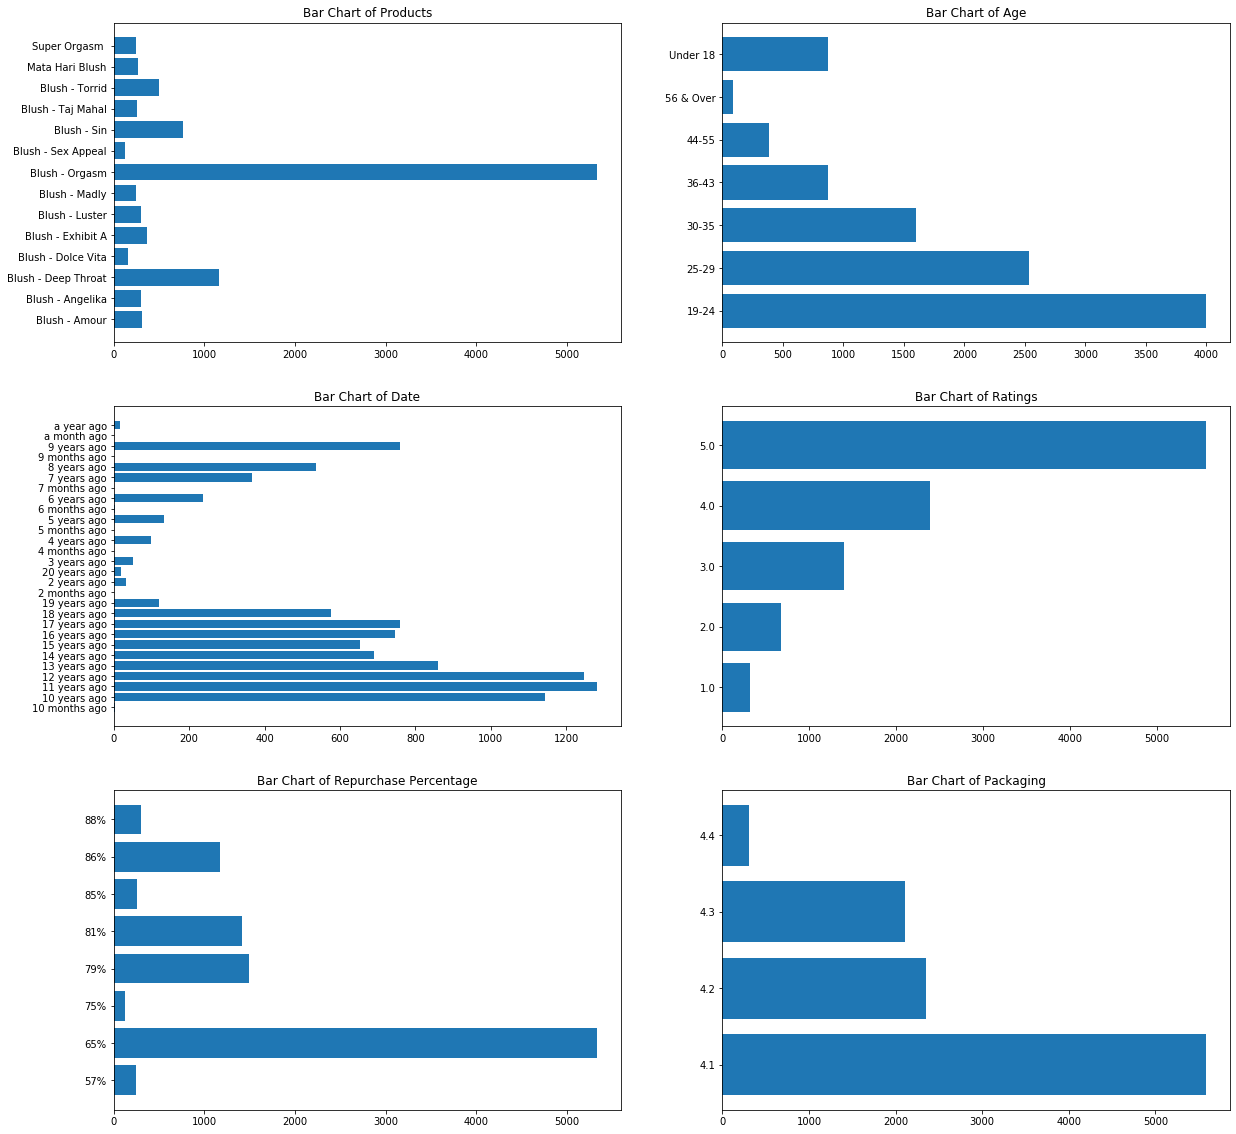

In [15]:
# Plot distribution for Product, Age, Date, Ratings, Repurchase and Packaging
fig, ax = plt.subplots(3,2,figsize=(20,20))

ax[0,0].barh(products['product'].value_counts().sort_index().index,products['product'].value_counts().sort_index().values)
ax[0,0].title.set_text('Bar Chart of Products')
ax[0,1].barh(products['age'].value_counts().sort_index().index,products['age'].value_counts().sort_index().values)
ax[0,1].title.set_text('Bar Chart of Age')

ax[1,0].barh(products['date'].value_counts().sort_index().index,products['date'].value_counts().sort_index().values)
ax[1,0].title.set_text('Bar Chart of Date')
ax[1,1].barh(products['ratings'].value_counts().sort_index().index,products['ratings'].value_counts().sort_index().values)
ax[1,1].title.set_text('Bar Chart of Ratings')

ax[2,0].barh(products['repurchase'].value_counts().sort_index().index,products['repurchase'].value_counts().sort_index().values)
ax[2,0].title.set_text('Bar Chart of Repurchase Percentage')
ax[2,1].barh(products['packaging'].value_counts().sort_index().index,products['packaging'].value_counts().sort_index().values)
ax[2,1].title.set_text('Bar Chart of Packaging')

# Most of the reviewers are millennials (reasonable, follows expectations)
# Repurchase percentages are generally quite high (all >= 50%)
# Overall Ratings are also generally quite high (more than half gave 5/5)
# Packaging rating also generally quite high (at least 4/5 stars)
# Reasonable and follows expectations because NARS is a famous makeup brand with high quality pigmented products

# Text Data Exploration

In [16]:
from langdetect import detect
from wordcloud import WordCloud
import re

In [17]:
# Check for random sample of reviews
products['review'].sample(n=10)

2986    Wow, how can I write a review about this produ...
3519    Thanks to the peachy color and subtle shimmer,...
3546    Orgasm is a peachy pink confection with a fair...
4222    I liked this blush.  It makes my cheeks look n...
1675    I love this blush, the shade is absolutely per...
8337    Fantasic for dark skin, I use it with Exhibit ...
5347    I have fair-medium skin and this blush gives m...
7119    God this is a gorgeous blush.  I really never ...
5616    Best blush I have used so far. I dithered abou...
5534    Worth the hype, beautiful pink/coral blush wit...
Name: review, dtype: object

count    10348.000000
mean       185.288268
std         32.466639
min          1.000000
25%        194.000000
50%        197.000000
75%        199.000000
max        200.000000
Name: review_length, dtype: float64


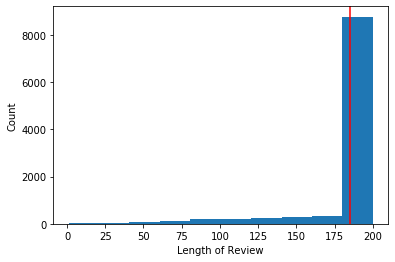

In [18]:
products['review_length'] = products['review'].apply(lambda x: len(x))

plt.hist(products['review_length'])
plt.xlabel('Length of Review')
plt.ylabel('Count')
plt.axvline(x=products['review_length'].mean(), color='red')
print(products['review_length'].describe())

# Most reviews have sufficient number of characters for analysis

In [19]:
# Check for reviews with only length 1
products[products['review_length'] == 1]

,index,product,user_id,age,date,review,ratings,repurchase,packaging,price,review_length
463,693,Blush - Orgasm,oppositeofdog,Under 18,7 years ago,,5.0,65%,4.1,4,1


In [20]:
# Remove the review 
products = products[products['review_length'] > 1]

In [21]:
# Check if reviews are in English
products['english'] = products['review'].apply(lambda x: detect(x) == 'en')

In [22]:
products['english'].value_counts()

True     10321
False       26
Name: english, dtype: int64

In [23]:
# Check for random sample of Non-English reviews
products[products['english'] == False].sample(n=5)

,index,product,user_id,age,date,review,ratings,repurchase,packaging,price,review_length,english
1014,1519,Blush - Orgasm,Krimlight,Under 18,9 years ago,Rientra assolutamente nella lista dei miei 3 b...,5.0,65%,4.1,4,195,False
8202,12313,Blush - Taj Mahal,MiriamNJ,36-43,7 years ago,"Este es mi colorete favorito para verano, sin ...",5.0,85%,4.2,4,182,False
4418,6623,Blush - Orgasm,STACEYFFF,30-35,16 years ago,YSE! YES! YES! YES! YES! YES! YES! YES! YES! Y...,4.0,65%,4.1,4,79,False
23,33,Blush - Orgasm,Abelaine,36-43,2 years ago,I love it,5.0,65%,4.1,4,9,False
7067,10605,Blush - Sin,Souris,25-29,17 years ago,Too dark for me.,4.0,79%,4.3,4,17,False


In [24]:
# Check for random sample of English reviews
products[products['english'] == True].sample(n=5)

,index,product,user_id,age,date,review,ratings,repurchase,packaging,price,review_length,english
1142,1712,Blush - Orgasm,monica6338,19-24,9 years ago,love it my fav blush ever! so flattering for a...,5.0,65%,4.1,4,56,True
2500,3750,Blush - Orgasm,Sour,19-24,12 years ago,This is the perfect peachy pink. The shimmer i...,5.0,65%,4.1,4,200,True
9149,13740,Blush - Angelika,CaliforniaPrincess89,19-24,9 years ago,I absolutely LOVE LOVE LOVE this blush:) My fa...,5.0,79%,4.3,4,142,True
4321,6481,Blush - Orgasm,chenlily,25-29,16 years ago,"it is beautiful, but a little over-rated",4.0,65%,4.1,4,40,True
8318,12489,Blush - Taj Mahal,justavietgyrl,30-35,11 years ago,Love love love. There is no other color out th...,5.0,85%,4.2,4,200,True


In [25]:
# Drop Non-English reviews
products = products[products['english'] == True].drop(['english'], axis=1)

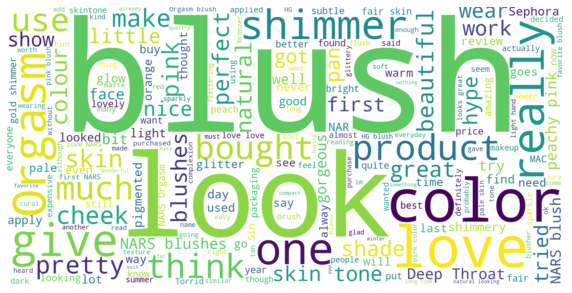

In [26]:
# Wordcloud
all_reviews = " ".join(r for r in products['review'])

# Create and generate a word cloud image
wordcloud = WordCloud(background_color="white", width=2000, height=1000).generate(all_reviews)

# Display the generated image
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
# Top 20 Words
tokens = products['review'].apply(lambda row: row.split(" "))

words = tokens.apply(lambda y: pd.value_counts(re.findall('([\s]\w+[\s])',' '.join(y))))\
                  .sum(axis=0)\
                  .to_frame()\
                  .reset_index()\
                  .sort_values(by=0,ascending=False)

words.columns = ['word','occurences']

words.head(20)

,word,occurences
903,I,9617.0
1787,a,5866.0
1931,and,5330.0
5729,the,4872.0
3866,it,4308.0
3859,is,3707.0
5751,this,3602.0
5796,to,2885.0
2332,but,2813.0
4310,my,2710.0


# Non-Text Data Pre-processing

In [28]:
# Drop not useful columns
products.drop(columns=['index','price','user_id'], inplace=True)

In [29]:
# Drop data from more than 13 years ago and regroup 'months ago' rows to 'a year ago'
# Drop older years and group months to first year
products['date'] = products['date'].apply(lambda x: x.split(" ")[0] if 'year' in x else 1)
products['date'] = products['date'].apply(lambda x: 1 if x=='a' else int(x))
products['date'] = products['date'].apply(lambda x: -int(x))
products = products[products['date'] >= -13]

In [30]:
# Check if the dates are formatted correctly
products['date'].value_counts()

-11    1281
-12    1245
-10    1140
-13     858
-9      758
-8      536
-7      364
-6      238
-5      134
-4       97
-3       52
-1       33
-2       31
Name: date, dtype: int64

In [31]:
# Relabel 'ratings' column to repurchase again (1) if ratings 4/5 else won't repurchase again (0)
products['repurchase again'] = products['ratings'].apply(lambda x: 0 if float(x) < 4 else 1 )
products.drop(['ratings'], axis=1, inplace=True)
products.head()

,product,age,date,review,repurchase,packaging,review_length,repurchase again
0,Blush - Orgasm,44-55,-1,"I'm 48, Caucasian with olive undertones so tru...",65%,4.1,194,1
1,Blush - Orgasm,30-35,-1,I have to mention that the case is fabulous. A...,65%,4.1,196,1
2,Blush - Orgasm,30-35,-1,A coral-pink peach blush with a very fine gold...,65%,4.1,197,1
3,Blush - Orgasm,30-35,-1,"I'm not sure if it's a ""Universal"" color. It's...",65%,4.1,196,0
4,Blush - Orgasm,56 & Over,-1,The blush that works for everyone does not wor...,65%,4.1,181,0


In [32]:
products['repurchase again'].value_counts()
# No need to account for class imbalance

1    5117
0    1650
Name: repurchase again, dtype: int64

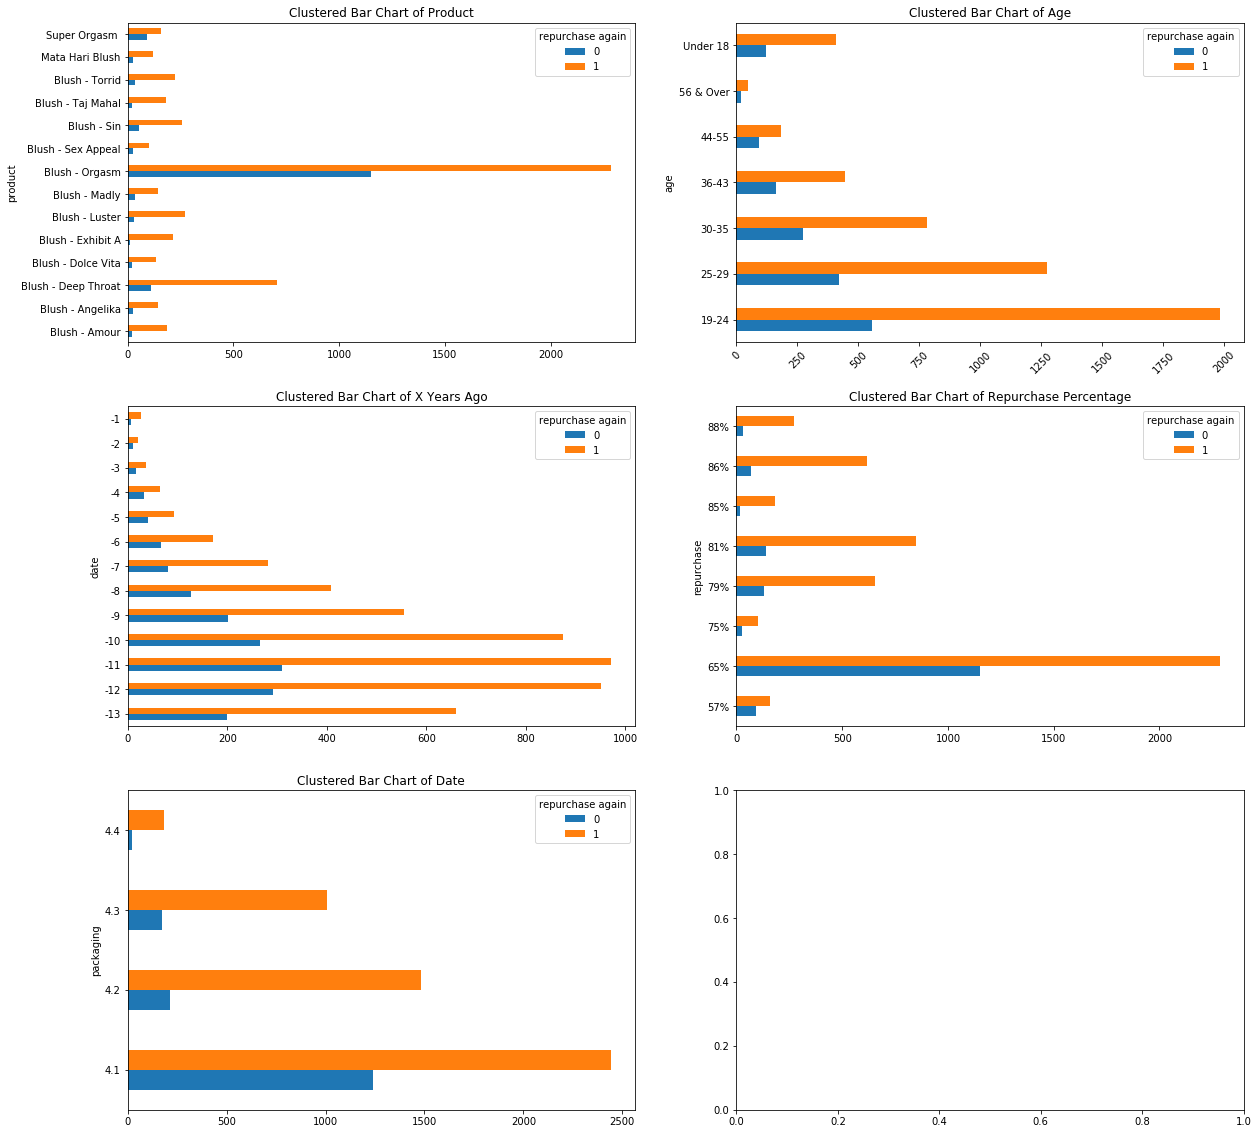

In [33]:
# Plot distribution for Product, Age, Date, Repurchase and Packaging
fig, ax = plt.subplots(3,2,figsize=(20,20))
products.groupby(['product','repurchase again'])['repurchase again'].count().unstack().plot(kind='barh',ax=ax[0,0])
ax[0,0].title.set_text('Clustered Bar Chart of Product')
ax[0,0].tick_params(axis='x', labelrotation=0)

products.groupby(['age','repurchase again'])['repurchase again'].count().unstack().plot(kind='barh',ax=ax[0,1])
ax[0,1].title.set_text('Clustered Bar Chart of Age')
ax[0,1].tick_params(axis='x', labelrotation=45)

products.groupby(['date','repurchase again'])['repurchase again'].count().unstack().plot(kind='barh',ax=ax[1,0])
ax[1,0].title.set_text('Clustered Bar Chart of X Years Ago')
ax[1,0].tick_params(axis='x', labelrotation=0)

products.groupby(['repurchase','repurchase again'])['repurchase again'].count().unstack().plot(kind='barh',ax=ax[1,1])
ax[1,1].title.set_text('Clustered Bar Chart of Repurchase Percentage')
ax[1,1].tick_params(axis='x', labelrotation=0)

products.groupby(['packaging','repurchase again'])['repurchase again'].count().unstack().plot(kind='barh',ax=ax[2,0])
ax[2,0].title.set_text('Clustered Bar Chart of Date')
ax[2,0].tick_params(axis='x', labelrotation=0)

# Generally, most people are willing to repurchase in every category
# 65% Repurchase Percentage, Blush - Orgasm and 4.1 Packaging Rating have a much higher proportion of those not willing to repurchase; should analyze these groups 

# Feature Engineering

In [34]:
# Conduct One-hot Encoding for Product and Age because they are nominal data (have to remove 1 dummy variable column to remove multi-collinearity problem)
products = pd.concat([products, pd.get_dummies(products['product'], prefix='product', drop_first=True)], axis=1)
products = pd.concat([products, pd.get_dummies(products['age'], prefix='age', drop_first=True)], axis=1)
products.drop(columns=['product','age'], inplace=True)

In [42]:
# Conduct Label Encoding for Packaging and Repurchase Percentage because they are ordinal data 
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
products['packaging'] = label_encoder.fit_transform(products['packaging'])
products['repurchase'] = label_encoder.fit_transform(products['repurchase'])

In [47]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6767 entries, 0 to 10106
Data columns (total 27 columns):
date                           6767 non-null int64
review                         6767 non-null object
repurchase                     6767 non-null int32
packaging                      6767 non-null int32
review_length                  6767 non-null int64
repurchase again               6767 non-null int64
product_Blush - Angelika       6767 non-null uint8
product_Blush - Deep Throat    6767 non-null uint8
product_Blush - Dolce Vita     6767 non-null uint8
product_Blush - Exhibit A      6767 non-null uint8
product_Blush - Luster         6767 non-null uint8
product_Blush - Madly          6767 non-null uint8
product_Blush - Orgasm         6767 non-null uint8
product_Blush - Sex Appeal     6767 non-null uint8
product_Blush - Sin            6767 non-null uint8
product_Blush - Taj Mahal      6767 non-null uint8
product_Blush - Torrid         6767 non-null uint8
product_Mata Hari Blush 